<a href="https://colab.research.google.com/github/EveTLynn/Personal_Projects/blob/main/DA_2022_04_Final_Project_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1. Overview

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?datasetId=178248&sortBy=voteCount

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

# Step 2. Libraries and data Import

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis testing
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression

# Machine Learning
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/VEF DA/Final Project/marketing_campaign.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Step 3. EDA

In [ ]:
df.describe()
# Z_CostContact and Z_Revenue contain only 3s and 11s -> drop these 2 variables

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# find numerical columns
df._get_numeric_data().columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# find categorical columns
df_numerical = df._get_numeric_data()
categorical_columns = set(df.columns) - set(df_numerical)
df[categorical_columns]

<ipython-input-6-72b0fd1506e7>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[categorical_columns]


,Dt_Customer,Marital_Status,Education
0,2012-09-04,Single,Graduation
1,2014-03-08,Single,Graduation
2,2013-08-21,Together,Graduation
3,2014-02-10,Together,Graduation
4,2014-01-19,Married,PhD
...,...,...,...
2235,2013-06-13,Married,Graduation
2236,2014-06-10,Together,PhD
2237,2014-01-25,Divorced,Graduation
2238,2014-01-24,Together,Master


In [ ]:
# Find the first and last customer's enrolment day
print(df['Dt_Customer'].describe())
print(df['Dt_Customer'].min())
print(df['Dt_Customer'].max())
# The last enrolment year is 2014, assuming that 2014 is the day of data retrieval to calculate customer's age

count           2240
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object
2012-07-30
2014-06-29


In [ ]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


## 3.1. Missing values

In [ ]:
df_na = (df.isnull().sum()/len(df)) * 100
df_na
# Income has missing values

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

## 3.2. Outliers

[]

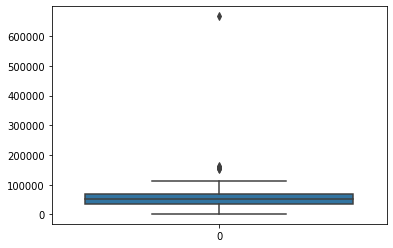

In [ ]:
sns.boxplot(data=df['Income'])
plt.plot()

Income has 1 variable that is very high -> drop this

[]

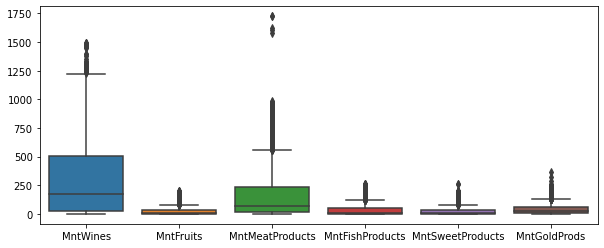

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.plot()

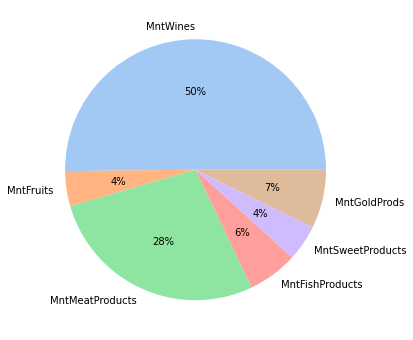

In [ ]:
keys = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# define Seaborn color palette to use
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(),
        labels=keys, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


[]

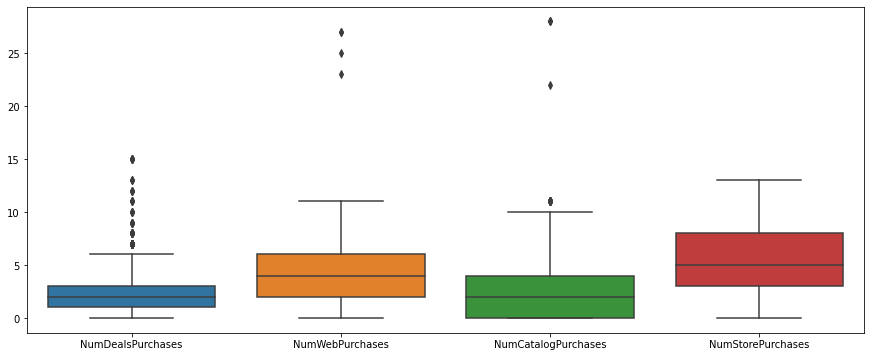

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
plt.plot()

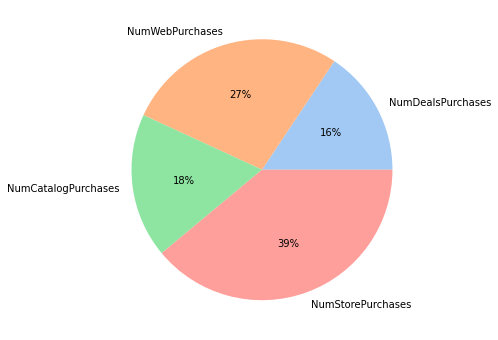

In [ ]:
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('pastel')
keys = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
plt.pie(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(),
        labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,4.084821,2.662054,5.790179,5.316518
std,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


<AxesSubplot:title={'center':'Amount of spend distribution'}, ylabel='Density'>

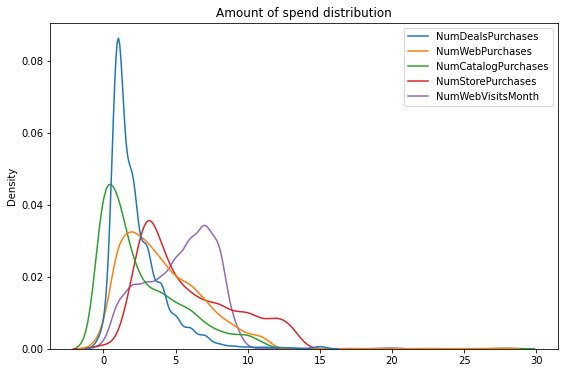

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.title('Amount of spend distribution')
sns.kdeplot(data=df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])

<AxesSubplot:title={'center':'Birth Year distribution'}, xlabel='Year_Birth', ylabel='Density'>

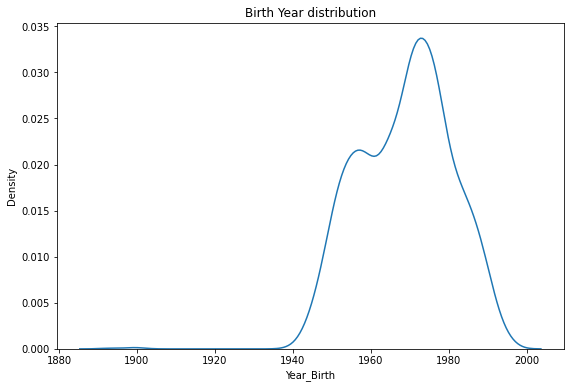

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.title('Birth Year distribution')
sns.kdeplot(data=df['Year_Birth'])

In [ ]:
df[df['NumCatalogPurchases']>20].T

,21,164,687,1653
ID,5376,8475,1501,4931
Year_Birth,1979,1973,1982,1977
Education,Graduation,PhD,PhD,Graduation
Marital_Status,Married,Married,Married,Together
Income,2447.0,157243.0,160803.0,157146.0
Kidhome,1,0,0,0
Teenhome,0,1,0,0
Dt_Customer,2013-01-06,2014-03-01,2012-08-04,2013-04-29
Recency,42,98,21,13
MntWines,1,20,55,1


Amount spent on products all contain outliers that need to be dealt with

## 3.3. Imbalanced Data

In [ ]:
pd.DataFrame(df.groupby(['Response']).Response.agg([len]))
# The number of people who accepted the offer is highly imbalanced comparing to those who didn't

,len
Response,
0,1906
1,334


# Step 4. Feature Engineering



## 4.1. Grouping values and columns

### Children

In [ ]:
df['child'] = df['Kidhome'] + df['Teenhome']
df.loc[(df['child'] > 0), 'child'] = 1
pd.DataFrame(df.groupby(['child']).child.agg([len]))

,len
child,
0,638
1,1602


### Marital_Status

In [ ]:
# Find the number of each label
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df.loc[df['Marital_Status'].isin(['Alone','YOLO','Absurd']), 'Marital_Status'] = 'Single'
df.Marital_Status.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [ ]:
df = df.join(pd.get_dummies(df['Marital_Status']))
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MonetaryValue,Frequency,age,age_range,Educational_years,Divorced,Married,Single,Together,Widow
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1617,25,57,55-64,12,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,27,6,60,55-64,12,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,776,21,49,45-54,12,0,0,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,53,8,30,25-34,12,0,0,0,1,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,422,19,33,25-34,21,0,1,0,0,0


### Amount Spent and Number of Purchases

In [ ]:
df['MonetaryValue'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Age

In [ ]:
df['age'] = 2014 - df['Year_Birth']
df['age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: age, dtype: float64

<AxesSubplot:title={'center':'Age distribution'}, xlabel='age', ylabel='Density'>

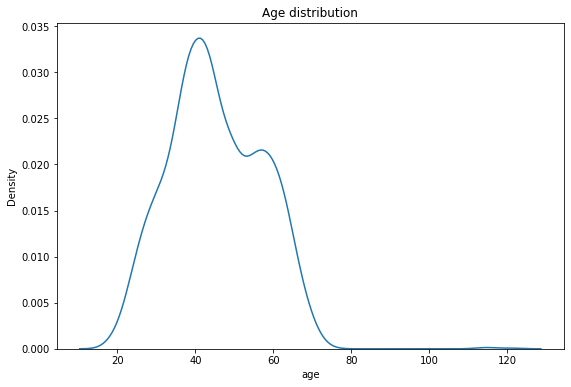

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.title('Age distribution')
sns.kdeplot(data=df['age'])

<AxesSubplot:>

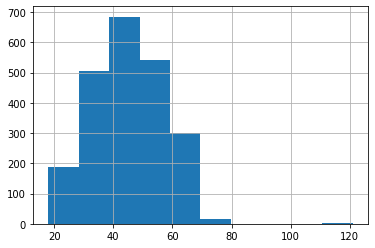

In [ ]:
df['age'].hist()

In [ ]:
df['age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: age, dtype: float64

In [ ]:
# 18-24, 25-34, 35-44, 45-54, 55-64, and 65 and older
df.loc[(df['age'] >=18) & (df['age'] < 25), 'age_range'] = '18-24'
df.loc[(df['age'] >=25) & (df['age'] < 35), 'age_range'] = '25-34'
df.loc[(df['age'] >=35) & (df['age'] < 45), 'age_range'] = '35-44'
df.loc[(df['age'] >=45) & (df['age'] < 55), 'age_range'] = '45-54'
df.loc[(df['age'] >=55) & (df['age'] < 65), 'age_range'] = '55-64'
df.loc[(df['age'] >=65), 'age_range'] = 'over 65'
df['age_range'].value_counts()

35-44      740
45-54      506
55-64      460
25-34      363
over 65    110
18-24       61
Name: age_range, dtype: int64

### Education

In [ ]:
df['Educational_years']=df['Education'].replace({'Basic':5,'2n Cycle':18,'Graduation':12,'Master':18,'PhD':21})

## 4.2. Handling outliers

### Income

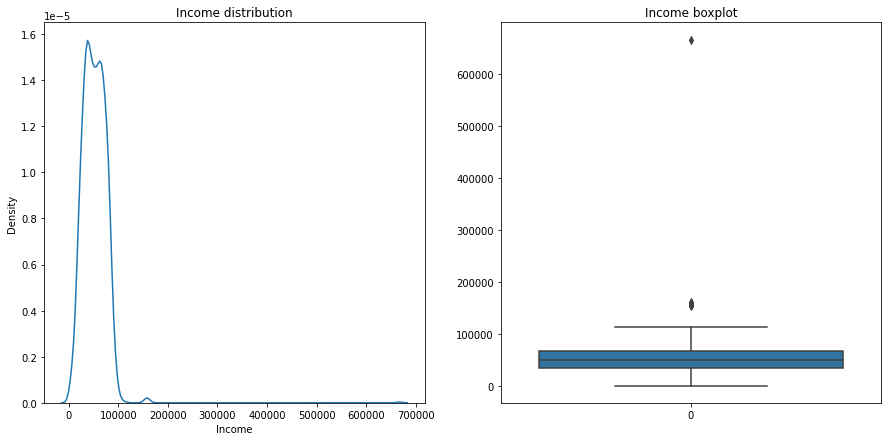

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)

plt.title('Income distribution')
sns.kdeplot(data=df['Income'])

plt.subplot(1,2,2)
plt.title('Income boxplot')
sns.boxplot(data=df['Income'])
plt.show()

In [ ]:
df_new = df.loc[df['Income']!=df['Income'].max()]
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,child,MonetaryValue,Frequency,age,Educational_years
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.013393,0.009375,3.0,11.0,0.149107,0.715179,605.798214,14.862054,45.194196,15.318750
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.114976,0.096391,0.0,0.0,0.356274,0.451430,602.249288,7.677173,11.984069,4.117979
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,18.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,8.000000,37.000000,12.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,15.000000,44.000000,12.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,21.000000,55.000000,18.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,1.000000,2525.000000,44.000000,121.000000,21.000000


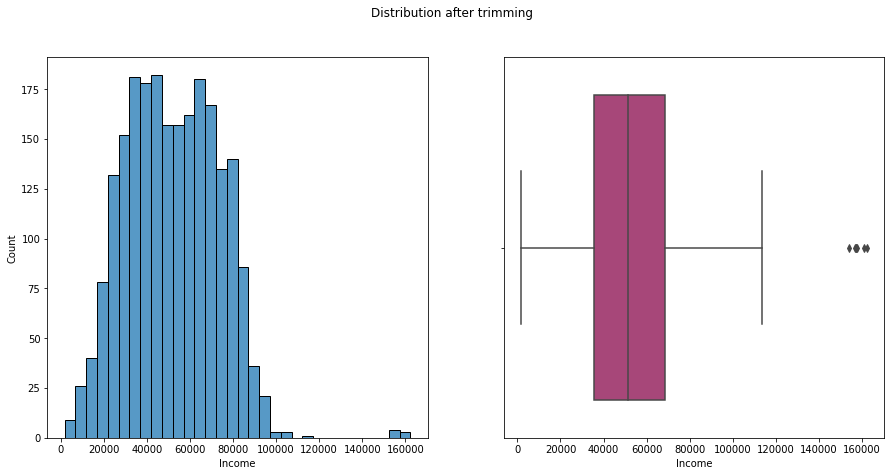

In [ ]:
plt.figure(figsize = (15,7))
plt.suptitle("Distribution after trimming")
plt.subplot(1,2,1)
sns.histplot(data=df_new, x='Income')
plt.subplot(1,2,2)
sns.boxplot(data=df_new, x='Income', palette='magma')
plt.show()

### Age

In [ ]:
df_sorted = df_new.sort_values(by = ['age'],ascending=False)
df_sorted.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Divorced,Married,Single,Together,Widow,MonetaryValue,Frequency,age,age_range,Educational_years
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,1,0,0,22,4,121,over 65,8
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,0,1,0,1853,15,115,over 65,21
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,0,0,0,0,65,6,114,over 65,8
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,0,0,1,0,0,157,9,74,over 65,21
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,0,1,0,0,0,2119,22,73,over 65,21
894,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,1,0,0,0,0,902,24,71,over 65,21
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,1,0,0,0,0,902,24,71,over 65,21
1150,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,0,0,0,0,1,1060,27,71,over 65,21
1923,4994,1943,Master,Single,77598.0,0,0,2013-10-01,53,1193,...,0,0,1,0,0,1735,26,71,over 65,18
415,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,...,0,1,0,0,0,1242,19,71,over 65,21


In [ ]:
df_new = df_new.loc[df_new['age']<100]
df_new.age.describe()

count    2236.000000
mean       45.101968
std        11.703281
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: age, dtype: float64

## 4.3. Income - Missing values

In [ ]:
contingency_table = pd.crosstab(df['Income'], df['Education'])
print(contingency_table)
# H0: Income and Education are independent
# Ha: Income and Education are NOT independent
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(p)

Education  2n Cycle  Basic  Graduation  Master  PhD
Income                                             
1730.0            0      0           1       0    0
2447.0            0      0           1       0    0
3502.0            0      0           1       0    0
4023.0            0      0           0       0    1
4428.0            0      0           1       0    0
...             ...    ...         ...     ...  ...
157243.0          0      0           0       0    1
157733.0          0      0           0       1    0
160803.0          0      0           0       0    1
162397.0          0      0           0       0    1
666666.0          0      0           1       0    0

[1974 rows x 5 columns]
5.825748980348574e-10


In [ ]:
contingency_table = pd.crosstab(df['Income'], df['Marital_Status'])
print(contingency_table)
# H0: Income and Marital_Status are independent
# Ha: Income and Marital_Status are NOT independent
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(p)

Marital_Status  Divorced  Married  Single  Together  Widow
Income                                                    
1730.0                 1        0       0         0      0
2447.0                 0        1       0         0      0
3502.0                 0        0       1         0      0
4023.0                 0        1       0         0      0
4428.0                 0        1       0         0      0
...                  ...      ...     ...       ...    ...
157243.0               0        1       0         0      0
157733.0               0        0       0         1      0
160803.0               0        1       0         0      0
162397.0               0        0       0         1      0
666666.0               0        0       0         1      0

[1974 rows x 5 columns]
4.978408519196278e-10


In [ ]:
contingency_table = pd.crosstab(df['Income'], df['child'])
print(contingency_table)
# H0: Income and Number of children are independent
# Ha: Income and Number of children are NOT independent
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(p)

child     0  1
Income        
1730.0    1  0
2447.0    0  1
3502.0    0  1
4023.0    0  1
4428.0    0  1
...      .. ..
157243.0  0  1
157733.0  0  1
160803.0  1  0
162397.0  0  1
666666.0  0  1

[1974 rows x 2 columns]
0.000502304264707485


In [ ]:
contingency_table = pd.crosstab(df_new['Income'], df_new['age_range'])
print(contingency_table)
# H0: Income and Number of children are independent
# Ha: Income and Number of children are NOT independent
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(p)

age_range  18-24  25-34  35-44  45-54  55-64  over 65
Income                                               
1730.0         0      0      1      0      0        0
2447.0         0      0      1      0      0        0
3502.0         0      0      1      0      0        0
4023.0         0      0      0      1      0        0
4428.0         0      0      0      1      0        0
...          ...    ...    ...    ...    ...      ...
157243.0       0      0      1      0      0        0
157733.0       0      0      1      0      0        0
160803.0       0      1      0      0      0        0
162397.0       0      0      1      0      0        0
666666.0       0      0      1      0      0        0

[1971 rows x 6 columns]
5.689194280938948e-12


In [ ]:
# Evaluate income based on
pd.DataFrame(df_new.groupby(['Education','Marital_Status','child','age_range']).Income.agg([len, 'mean', lambda x: x.isna().sum()*100/len(x)]))

len          mean  <lambda_0>
Education Marital_Status child age_range                               
2n Cycle  Divorced       0     35-44        3  42090.666667         0.0
                               45-54        1  87305.000000         0.0
                               55-64        2  70647.500000         0.0
                         1     25-34        1  35388.000000         0.0
                               35-44        7  35799.142857         0.0
...                                       ...           ...         ...
PhD       Widow          0     over 65      3  73859.000000         0.0
                         1     35-44        1  47111.000000         0.0
                               45-54        4  55213.500000         0.0
                               55-64        8  57387.875000         0.0
                               over 65      4  49850.000000         0.0

[203 rows x 3 columns]

In [ ]:
df_new['Income'] = df_new.groupby(['Education','Marital_Status','child','age_range']).Income.apply(lambda x: x.fillna(x.mean()))
df_new.Income.isna().sum()

0

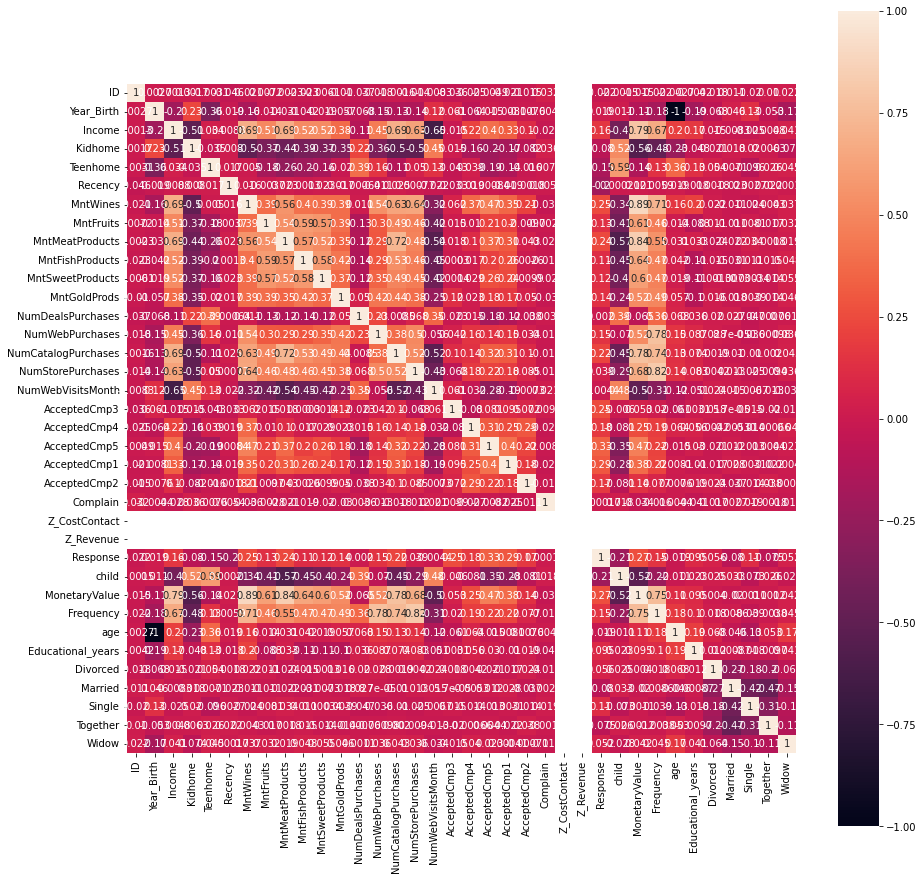

In [ ]:
# lấy ra 1 bảng toàn dữ liệu số
numerical_features = df_new._get_numeric_data()

# để tính toán nhanh, lấy ra mẫu vật bao gồm 25% dữ liệu
# sampled_numerical_features = numerical_features.sample(frac=0.25)

# Calculate the Correlation matrix of data frame without the Dependent variable (Just on 25% of data)
corr_matrix = numerical_features.corr()


# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

## 4.4. Drop uneeded columns

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df_RFM_cmp = df_new.drop(columns = ['Z_CostContact', 'Z_Revenue', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'ID',
                            'Year_Birth','Kidhome','Teenhome','Dt_Customer','age_range','Education','Marital_Status'])
df_RFM_cmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2236 non-null   float64
 1   Recency            2236 non-null   int64  
 2   NumWebVisitsMonth  2236 non-null   int64  
 3   AcceptedCmp3       2236 non-null   int64  
 4   AcceptedCmp4       2236 non-null   int64  
 5   AcceptedCmp5       2236 non-null   int64  
 6   AcceptedCmp1       2236 non-null   int64  
 7   AcceptedCmp2       2236 non-null   int64  
 8   Complain           2236 non-null   int64  
 9   Response           2236 non-null   int64  
 10  child              2236 non-null   int64  
 11  MonetaryValue      2236 non-null   int64  
 12  Frequency          2236 non-null   int64  
 13  age                2236 non-null   int64  
 14  Educational_years  2236 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 279.5 KB


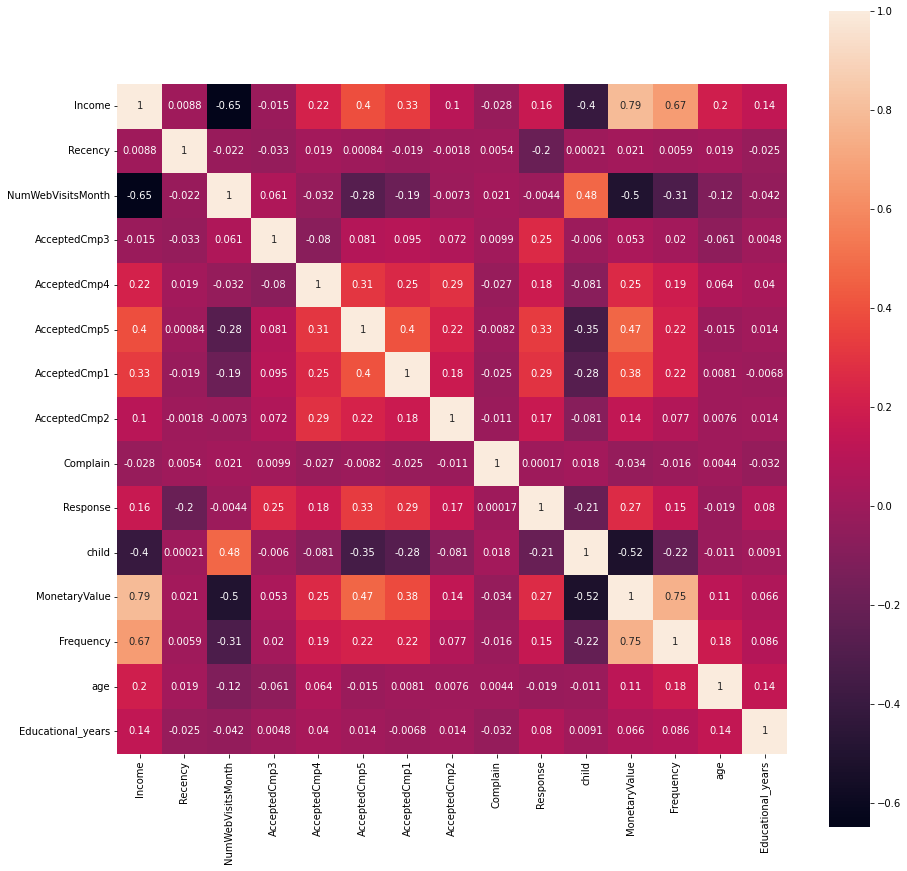

In [ ]:
# lấy ra 1 bảng toàn dữ liệu số
numerical_features = df_RFM_cmp._get_numeric_data()

# Calculate the Correlation matrix of data frame without the Dependent variable
corr_matrix = numerical_features.corr()

# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

In [ ]:
df_full = df_new.drop(columns = ['ID', 'Frequency','MonetaryValue', 'Year_Birth','Kidhome','Teenhome','Education','Marital_Status',
                                 'Dt_Customer','Z_CostContact','Z_Revenue','age_range'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2236 non-null   float64
 1   Recency              2236 non-null   int64  
 2   MntWines             2236 non-null   int64  
 3   MntFruits            2236 non-null   int64  
 4   MntMeatProducts      2236 non-null   int64  
 5   MntFishProducts      2236 non-null   int64  
 6   MntSweetProducts     2236 non-null   int64  
 7   MntGoldProds         2236 non-null   int64  
 8   NumDealsPurchases    2236 non-null   int64  
 9   NumWebPurchases      2236 non-null   int64  
 10  NumCatalogPurchases  2236 non-null   int64  
 11  NumStorePurchases    2236 non-null   int64  
 12  NumWebVisitsMonth    2236 non-null   int64  
 13  AcceptedCmp3         2236 non-null   int64  
 14  AcceptedCmp4         2236 non-null   int64  
 15  AcceptedCmp5         2236 non-null   i

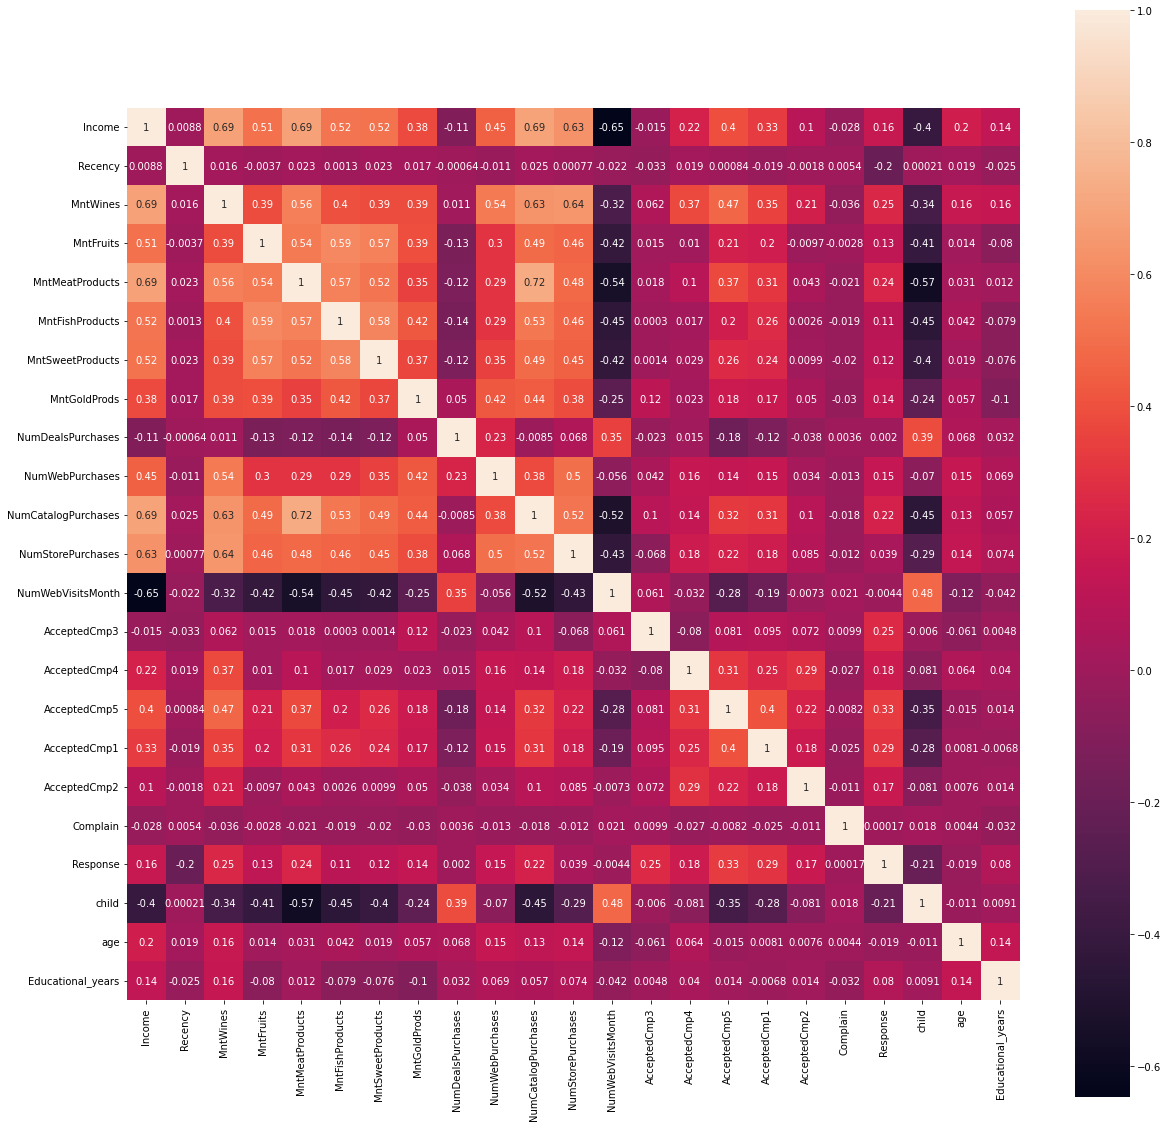

In [ ]:
# lấy ra 1 bảng toàn dữ liệu số
numerical_features = df_full._get_numeric_data()

# Calculate the Correlation matrix of data frame without the Dependent variable
corr_matrix = numerical_features.corr()

# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

In [ ]:
# threshold above which is considered too high of a correlation
corr_threshold = 0.6

# Create correlation matrix
corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than the correlation threshold
to_drop_corr = [column for column in upper.columns if any(upper[column] >= corr_threshold)]
print(to_drop_corr)

['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


<ipython-input-17-65b48215127f>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Step 5. Model Training

## 5.1 df_RFM_cmp

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df_RFM_cmp.drop(columns=['Response','MonetaryValue','Frequency']),
                                                   df_RFM_cmp.Response,
                                                   random_state=42,
                                                   test_size=0.2)
# scale train - test set
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### Without handling imbalanced data

In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       375
           1       0.60      0.33      0.42        73

    accuracy                           0.85       448
   macro avg       0.74      0.64      0.67       448
weighted avg       0.83      0.85      0.84       448



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       375
           1       0.49      0.48      0.48        73

    accuracy                           0.83       448
   macro avg       0.69      0.69      0.69       448
weighted avg       0.83      0.83      0.83       448



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Class weight

In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       375
           1       0.38      0.68      0.49        73

    accuracy                           0.77       448
   macro avg       0.65      0.73      0.67       448
weighted avg       0.84      0.77      0.79       448



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Decision Tree
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       375
           1       0.49      0.37      0.42        73

    accuracy                           0.83       448
   macro avg       0.69      0.65      0.66       448
weighted avg       0.82      0.83      0.83       448



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())
# Scale data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_res), columns = X_train_res.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (3054, 17)
After OverSampling, the shape of train_y: (3054,) 



In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.73
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       375
           1       0.35      0.73      0.47        73

    accuracy                           0.73       448
   macro avg       0.64      0.73      0.65       448
weighted avg       0.84      0.73      0.77       448



In [ ]:
est = sm.OLS(y_train, X_train) # OLS: ordinary least square
est2 = est.fit()
print(est2.summary())

In [ ]:
# Decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       375
           1       0.34      0.42      0.38        73

    accuracy                           0.77       448
   macro avg       0.61      0.63      0.62       448
weighted avg       0.79      0.77      0.78       448



## 5.2 df_full

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df_full.drop(columns=['Response','MntWines', 'MntMeatProducts',
                                                                          'NumCatalogPurchases', 'NumStorePurchases',
                                                                          'NumWebVisitsMonth']),
                                                   df_full.Response,
                                                   random_state=42,
                                                   test_size=0.2)
# scale train - test set
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### Without handling imbalanced data

In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       375
           1       0.64      0.37      0.47        73

    accuracy                           0.86       448
   macro avg       0.76      0.66      0.70       448
weighted avg       0.85      0.86      0.85       448



In [ ]:
# Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       375
           1       0.38      0.42      0.40        73

    accuracy                           0.79       448
   macro avg       0.63      0.64      0.64       448
weighted avg       0.80      0.79      0.80       448



### Class Weight

In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.76
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       375
           1       0.38      0.74      0.50        73

    accuracy                           0.76       448
   macro avg       0.66      0.75      0.67       448
weighted avg       0.85      0.76      0.79       448



In [ ]:
# Decision Tree
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       375
           1       0.41      0.37      0.39        73

    accuracy                           0.81       448
   macro avg       0.64      0.63      0.64       448
weighted avg       0.80      0.81      0.81       448



### SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())
# Scale data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_res), columns = X_train_res.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.73
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       375
           1       0.34      0.73      0.46        73

    accuracy                           0.73       448
   macro avg       0.64      0.73      0.64       448
weighted avg       0.84      0.73      0.76       448



In [ ]:
# Logistic Regression
model = DecisionTreeClassifier(random_state=42,)
model.fit(X_train_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       375
           1       0.37      0.53      0.44        73

    accuracy                           0.78       448
   macro avg       0.64      0.68      0.65       448
weighted avg       0.81      0.78      0.79       448



In [ ]:
# Extreme Gradient Boosted Trees
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_scaled, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       375
           1       0.43      0.45      0.44        73

    accuracy                           0.81       448
   macro avg       0.66      0.67      0.66       448
weighted avg       0.82      0.81      0.81       448

